371024 Introducción al Aprendizaje Máquina  
Proyecto Primer Parcial  
`Lic. Jose Ricardo Mendoza Villar`

# 1. Escoger una base de datos de kaggle con al menos 5 columnas para entrenar un modelo de regresión lineal múltiple, incluir el link a la base de datos.  
- Base de Datos: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("boston.csv")

In [3]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
# Se realiza un one-hot encoding porque la variable RAD, representa un índice de accesibilidad, por lo que se le da un tratamiento categórico
dummies = pd.get_dummies(df["RAD"], dtype = int)
dummies.columns = map(str, dummies.columns)
df = pd.concat([dummies, df], axis=1).drop(["RAD"], axis = 1)

In [5]:
df.head(3)

,1,2,3,4,5,6,7,8,24,CRIM,...,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0,0,0,0,0,0,0,0,0.00632,...,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0,1,0,0,0,0,0,0,0,0.02731,...,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0,1,0,0,0,0,0,0,0,0.02729,...,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7


# 2. Escoger una de las columnas de la base de datos como variable objetivo.

In [6]:
X = df.drop("MEDV", axis = 1)
y = df[["MEDV"]]

# 3. Separar la base de datos en una de entrenamiento y otra de prueba.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as rmse

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250402) 

# 4. Las columnas restantes serán utilizadas como variables descriptivas en el modelo de regresión lineal. Escoger 3 de estas variables y, para cada una:
a. Entrenar un modelo de regresión lineal simple, utilizando la base de entrenamiento.  
b. Utilizar el modelo entrenado para hacer predicciones en la base de prueba.  
c. Gráficar los datos en un diagrama de dispersión y dibujar la recta que mejor ajusta a los puntos.  
d. Calcular las métricas de rendimiento “r cuadrado” y “rmse”.

In [9]:
from sklearn.linear_model import LinearRegression

##################################################
-----Característica descriptiva: TAX ----
----- Diagrama de Dispersión ----


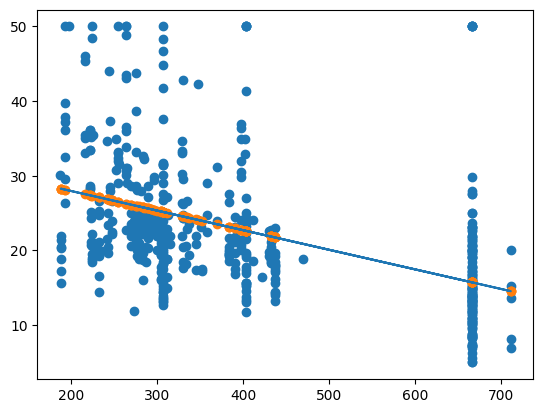

----- Métricas de Rendimiento ----
R^2: 0.20178207140490034
RMSE: 8.175548689171219
##################################################
-----Característica descriptiva: CRIM ----
----- Diagrama de Dispersión ----


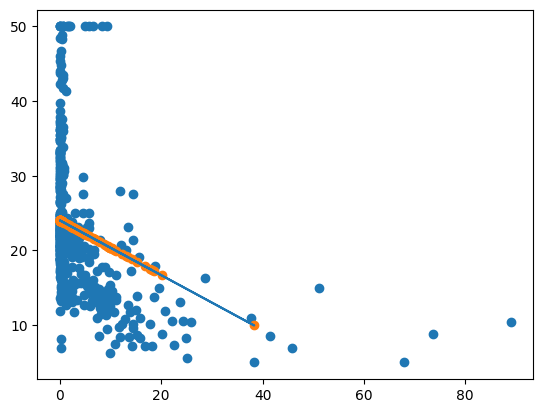

----- Métricas de Rendimiento ----
R^2: 0.15028778171978108
RMSE: 8.435136246313602
##################################################
-----Característica descriptiva: ZN ----
----- Diagrama de Dispersión ----


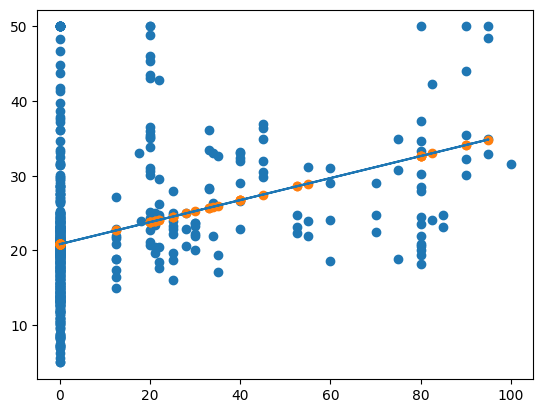

----- Métricas de Rendimiento ----
R^2: 0.08872738465970265
RMSE: 8.735350390044065


In [10]:
for colname in ["TAX", "CRIM", "ZN"]:
    print("#"*50)
    print(f"-----Característica descriptiva: {colname} ----")
    regSimple = LinearRegression()
    # A. Entrenar el modelo, utilizando la base de entrenamiento
    regSimple.fit(X_train[[colname]], y_train)
    # B. Realizar predicciones en la base de prueba
    predicciones = regSimple.predict(X_test[[colname]])
    # C. Diagrama de dispersión
    print("----- Diagrama de Dispersión ----")
    plt.scatter(X[[colname]], y)
    plt.scatter(X_test[[colname]], predicciones)
    plt.plot(X_test[[colname]], predicciones)
    plt.show()
    # D. Métricas de rendimiento
    print("----- Métricas de Rendimiento ----")
    print(f"R^2: {regSimple.score(X_test[[colname]], y_test)}")
    print(f"RMSE: {rmse(y_test, predicciones)}")

# 5. Entrenar un modelo de regresión lineal múltiple utilizando todas las variables descriptivas.

In [11]:
regMultiple = LinearRegression()
regMultiple.fit(X_train, y_train)
predicciones = regMultiple.predict(X_test)

# 6. Calcular las métricas de rendimiento “r cuadrado” y “rmse” para el modelo anterior y compararlas con las métricas de los “modelos simples” del punto 3c. ¿Qué puede decir de esta comparación?

In [12]:
print("----- Métricas de Rendimiento ----")
print(f"R^2: {regMultiple.score(X_test, y_test)}")
print(f"RMSE: {rmse(y_test, predicciones)}")

----- Métricas de Rendimiento ----
R^2: 0.7268433809611349
RMSE: 4.7825777005540875


Se puede notar un aumento muy significativo al utilizar la métrica R^2, pasamos de modelos lineales simples con R^2 de: 0.201, 0.15 y 0.08 a un modelo de regresión lineal múltiple con R^2 de 0.726, para el caso de RMSE, vemos una disminución, que representa también una mejora en el modelo, pasamos de métricas de 8.175, 8.435 y 8.735 a un RMSE para el modelo regresión múltiple de: 4.782, lo que significa que hubo una disminución bastante significativa en la variabilidad promedio de las predicciones del modelo, en este caso, considerar todas las variables descriptivas resultó en una mejora del modelo para realizar las predicciones.